Medidas  de concentração e deisgualdade

In [162]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [261]:
def plot_curve(x, y):
    fig, ax = plt.subplots(figsize=(8,6))
    ax.plot([0,1], [0,1], color='k')
    ax.set_ylim([0,1])
    ax.set_xlim([0,1])
    ax2 = ax.twinx()
    ax2.plot(x, y)
    ax2.set_ylim([0,1])
    ax2.set_xlim([0,1])
    ax2.tick_params(left=False, labelleft=False,
                right=False, labelright=False)
    plt.show()
    
def lorenz_curve(data, plot_graph = False):
    total = np.sum(data)
    q = np.cumsum(data)/total
    p = np.array([i/len(data) for i in range(1,len(data)+1)])
    q = np.insert(q, 0, 0) 
    p = np.insert(p, 0, 0) 
    if plot_graph == True:
        plot_curve(p, q)
    return p, q

def gini_idx(data):
    mean = np.mean(data)
    data = sorted(data)
    data = np.cumsum(data)
    const = 1/(np.square(np.size(data)))
    mean_dif = const*np.sum([np.abs(i-j) for i in data for j in data])
    return mean_dif/(2*np.mean(data))

def max_disc(data):
    mean = np.mean(data)
    const = 1/np.size(data)
    mean_deviat = const*np.sum([np.abs(i-mean) for i in data])
    return mean_deviat/(2*mean)

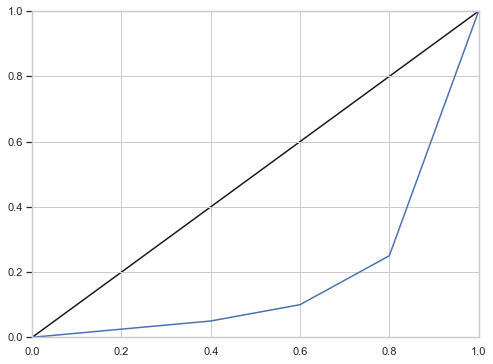

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 array([0.   , 0.025, 0.05 , 0.1  , 0.25 , 1.   ]))

In [263]:
clorenz = np.array([1,1,2,6,30])
lorenz_curve(clorenz, plot_graph = True)

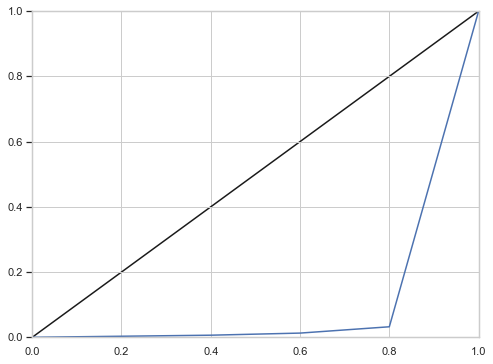

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 array([0.        , 0.00322581, 0.00645161, 0.01290323, 0.03225806,
        1.        ]))

In [264]:
clorenz2 = [1,1,2,6,300]
lorenz_curve(clorenz2, True)

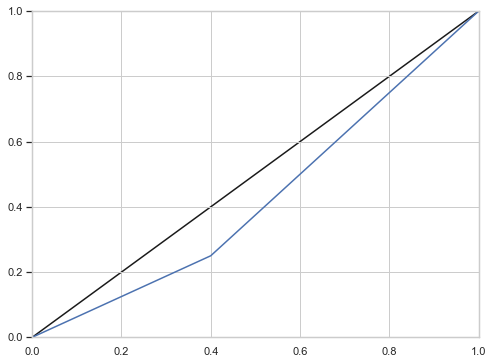

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 array([0.   , 0.125, 0.25 , 0.5  , 0.75 , 1.   ]))

In [265]:
clorenz2 = [1,1,2,2,2]
lorenz_curve(clorenz2, True)

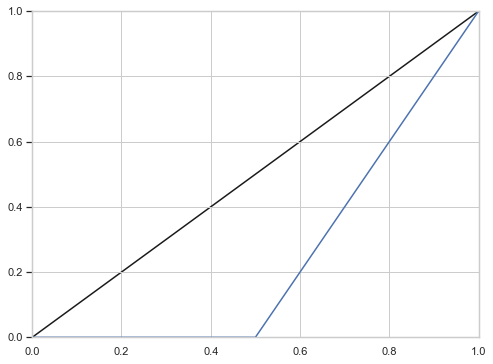

0.5

In [266]:
x = [0,3.75]
lorenz_curve(x, True)
gini_idx(x)

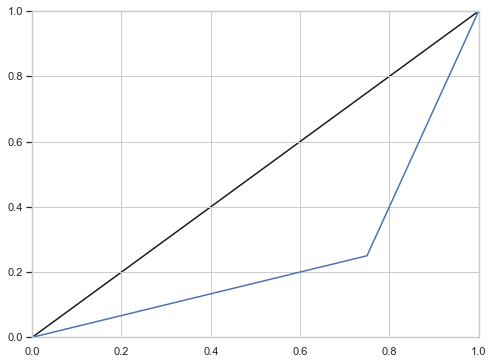

0.47
0.50


0.5

In [274]:
x = [1/12 if i<3 else 9/12 for i in range(4)]
p,q = lorenz_curve(x, True)
print(f'{gini_idx(x):.2f}')
print(f'{max_disc(x):.2f}')
a = np.linspace(min(q), max(q), len(q))
np.max(a - q) 

In [268]:
np